In [ ]:
!pip install keras-unet-collection


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 687.9 kB/s eta 0:00:00


In [ ]:
!pip install keras --upgrade
!pip install tensorflow --upgrade


In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ROCAUC
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam,SGD
from keras.metrics import MeanIoU
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd
from tensorflow.keras.utils import normalize
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import glob
import random
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Activation
from keras.layers import MaxPool2D, Concatenate
from sklearn.model_selection import KFold


In [ ]:
from keras_unet_collection import models

#**Second Method: Segmentation using U-Net**

------------------------------------------------------------------------------------------------------

#  ** U-Net for Image Segmentation**

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:

image_directory = '/content/drive/MyDrive/brain_tumor_custom/train'
mask_directory = '/content/drive/MyDrive/brain_tumor_custom/Mask'

In [ ]:

SIZE = 256
num_images = 51

Load images and masks in order so they match

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/brain_tumor_custom/Tumor/*.tif")
print(image_names)

['/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6665_20010817_11.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5396_20010302_16.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5393_19990606_8.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5393_19990606_11.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5397_20010315_8.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6290_20000917_8.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6667_20011105_17.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6666_20011109_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6188_20010812_15.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5396_20010302_12.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_DU_5849_19950405_25.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6665_20010817_12.tif', '/content/drive/MyDrive/brain_tumor_custom

In [ ]:

image_names.sort()
print(image_names)

['/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4941_19960909_11.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4941_19960909_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_13.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_17.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_18.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_19.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_20.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_12.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_13.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_6.tif', '/content/drive/MyDrive/brain_tumor_cust

In [ ]:
images = [cv2.imread(img, 0) for img in image_names]

In [ ]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)
image_dataset

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [2]],

        [[1],
         [1],
         [2],
         ...,
         [2],
         [1],
         [1]],

        [[2],
         [3],
         [2],
         ...,
         [1],
         [1],
         [2]],

        ...,

        [[2],
         [3],
         [2],
         ...,
         [7],
         [4],
         [1]],

        [[3],
         [3],
         [3],
         ...,
         [2],
         [3],
         [2]],

        [[2],
         [4],
         [3],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [1],
         [2],
         ...,
         [1],
         [1],
         [1]],

        [[2],
         [2],
         [3],
         ...,
         [2],
         [1],
         [1]],

        [[3],
         [2],
         [3],
         ...,
         [2],
         [1],
         [2]],

        ...,

        [[2],
         [2],
         [2],
         ...,
         [4],


Read masks same way

In [ ]:

mask_names = glob.glob("/content/drive/MyDrive/brain_tumor_custom/Mask/*.tif")
mask_names.sort()
masks = [cv2.imread(mask, 0) for mask in mask_names]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)
mask_dataset

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))


Image data shape is:  (51, 256, 256, 1)
Mask data shape is:  (51, 256, 256, 1)
Max pixel value in image is:  233
Labels in the mask are :  [  0 255]


In [ ]:
#Normalize images
image_dataset = image_dataset /233.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


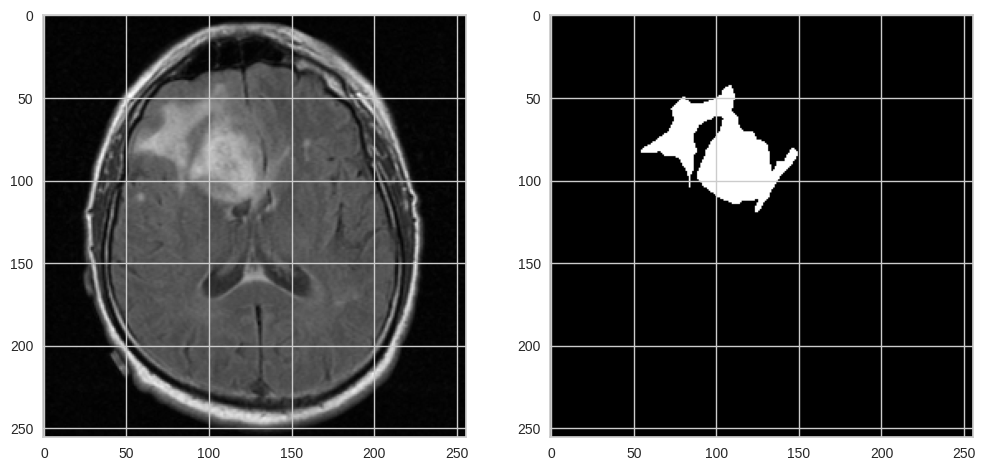

In [ ]:
#Sanity check, view few mages

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()


In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)


In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=SGD(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 64)         640       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 256, 256, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 256, 256, 64)         0         ['batch_normalizat

In [ ]:

# Define the number of folds
n_splits = 5  # Example: 5-fold cross-validation

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {fold + 1}/{n_splits}")

    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold, batch_size=16, epochs=25, verbose=1)

    # Evaluate the model on the validation set for this fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Fold 1/5
Epoch 1/25
2/2 [==============================] - 205s 99s/step - loss: 0.8809 - accuracy: 0.4003
Epoch 2/25
2/2 [==============================] - 201s 99s/step - loss: 0.8689 - accuracy: 0.4212
Epoch 3/25
2/2 [==============================] - 201s 99s/step - loss: 0.8586 - accuracy: 0.4400
Epoch 4/25
2/2 [==============================] - 199s 98s/step - loss: 0.8491 - accuracy: 0.4576
Epoch 5/25
2/2 [==============================] - 200s 100s/step - loss: 0.8393 - accuracy: 0.4745
Epoch 6/25
2/2 [==============================] - 200s 99s/step - loss: 0.8300 - accuracy: 0.4908
Epoch 7/25
2/2 [==============================] - 199s 99s/step - loss: 0.8203 - accuracy: 0.5049
Epoch 8/25
2/2 [==============================] - 200s 99s/step - loss: 0.8117 - accuracy: 0.5194
Epoch 9/25
2/2 [==============================] - 201s 101s/step - loss: 0.8030 - accuracy: 0.5345
Epoch 10/25
2/2 [==============================] - 198s 99s/step - loss: 0.7942 - accuracy: 0.5476
Epoch 11

In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/Aarchive_/brain_tumor_custom/model_25epochs_5cv.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


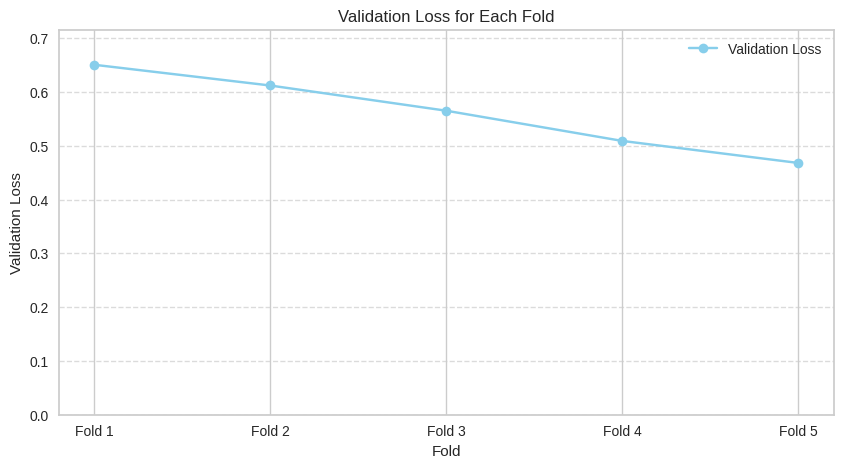

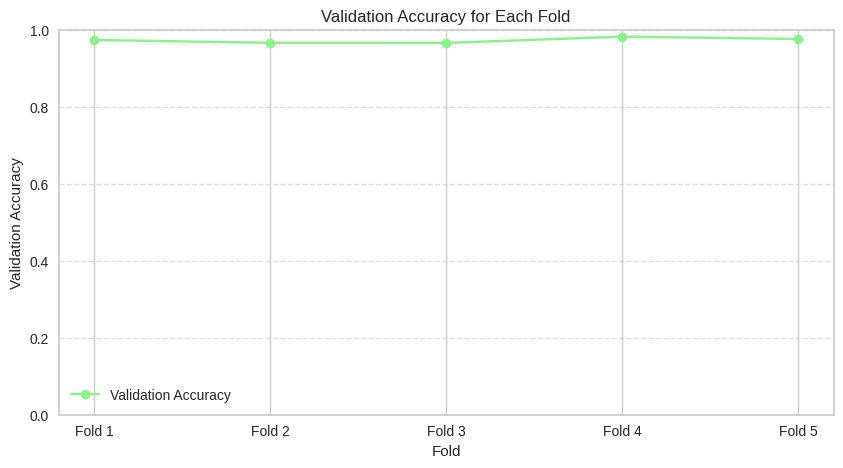

In [ ]:

# Validation loss and accuracy values
validation_losses = [0.6505955457687378, 0.6120062470436096, 0.5651272535324097, 0.5089523196220398, 0.46796584129333496]
validation_accuracies = [0.9733390808105469, 0.9660243988037109, 0.9656257629394531, 0.9820785522460938, 0.9759807586669922]

# Folds
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# Plotting validation loss
plt.figure(figsize=(10, 5))
plt.plot(folds, validation_losses, marker='o', color='skyblue', label='Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Each Fold')
plt.ylim(0, max(validation_losses) * 1.1)  # Set y-axis limit to ensure space for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Plotting validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(folds, validation_accuracies, marker='o', color='lightgreen', label='Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Each Fold')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Aarchive_/brain_tumor_custom/model_25epochs.hdf5", compile=False)


In [ ]:

#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

1/1 [==============================] - 33s 33s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.345372


In [ ]:
# Define a function to calculate Dice coefficient
def calculate_dice(y_true, y_pred):
    numerator = 2 * np.logical_and(y_true, y_pred).sum()
    denominator = y_true.sum() + y_pred.sum()
    dice = numerator / denominator
    return dice

In [ ]:
dice=calculate_dice(y_pred_thresholded, y_test)
dice

0.0551587332700857

# **Conclusion of the first model**
there is an overfitting issue;although the accuracy on training data gives perfect performance, the validation accuracy was not stable decreasing and incresing  with validation data

##Improvment 1 :apply use stochastic gradient decent with larger step

In [ ]:

image_directory = '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor'
mask_directory = '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Mask'

In [ ]:

SIZE = 256
num_images = 51

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/brain_tumor_custom/Tumor/*.tif")
print(image_names)

['/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6665_20010817_11.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5396_20010302_16.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5393_19990606_8.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5393_19990606_11.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5397_20010315_8.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6290_20000917_8.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6667_20011105_17.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6666_20011109_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6188_20010812_15.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_5396_20010302_12.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_DU_5849_19950405_25.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_6665_20010817_12.tif', '/content/drive/MyDrive/brain_tumor_custom

In [ ]:

image_names.sort()
print(image_names)

['/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4941_19960909_11.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4941_19960909_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_13.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_17.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_18.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_19.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4943_20000902_20.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_12.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_13.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_14.tif', '/content/drive/MyDrive/brain_tumor_custom/Tumor/TCGA_CS_4944_20010208_6.tif', '/content/drive/MyDrive/brain_tumor_cust

In [ ]:
images = [cv2.imread(img, 0) for img in image_names]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)
image_dataset

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [2]],

        [[1],
         [1],
         [2],
         ...,
         [2],
         [1],
         [1]],

        [[2],
         [3],
         [2],
         ...,
         [1],
         [1],
         [2]],

        ...,

        [[2],
         [3],
         [2],
         ...,
         [7],
         [4],
         [1]],

        [[3],
         [3],
         [3],
         ...,
         [2],
         [3],
         [2]],

        [[2],
         [4],
         [3],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [1],
         [2],
         ...,
         [1],
         [1],
         [1]],

        [[2],
         [2],
         [3],
         ...,
         [2],
         [1],
         [1]],

        [[3],
         [2],
         [3],
         ...,
         [2],
         [1],
         [2]],

        ...,

        [[2],
         [2],
         [2],
         ...,
         [4],


In [ ]:

mask_names = glob.glob("/content/drive/MyDrive/brain_tumor_custom/Mask/*.tif")
mask_names.sort()
masks = [cv2.imread(mask, 0) for mask in mask_names]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)
mask_dataset

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))


Image data shape is:  (51, 256, 256, 1)
Mask data shape is:  (51, 256, 256, 1)
Max pixel value in image is:  233
Labels in the mask are :  [  0 255]


In [ ]:

#Normalize images
image_dataset = image_dataset /233.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


In [ ]:
X_train
y_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

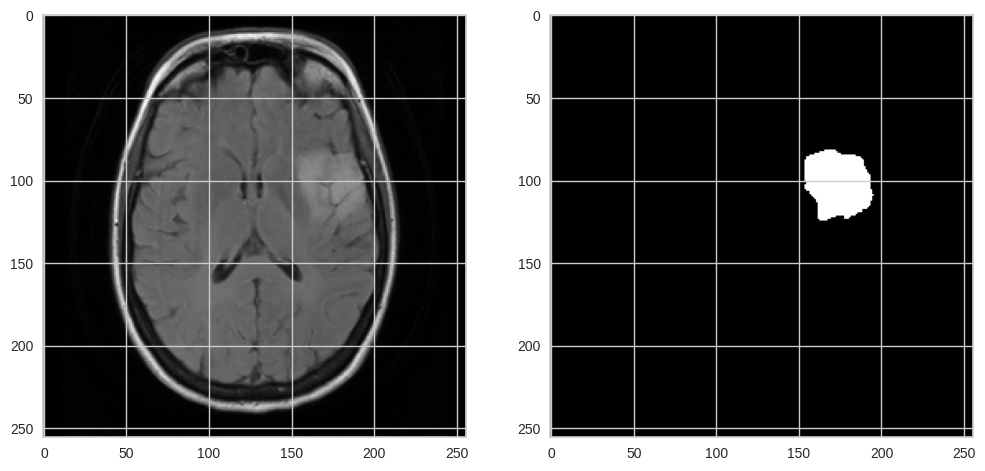

In [ ]:
#Sanity check, view few mages

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
input_shape

(256, 256, 1)

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=SGD(learning_rate = 0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['batch_normalizat

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/20
3/3 [==============================] - 96s 22s/step - loss: 0.7867 - accuracy: 0.4876 - val_loss: 0.6079 - val_accuracy: 0.9695
Epoch 2/20
3/3 [==============================] - 2s 813ms/step - loss: 0.2879 - accuracy: 0.9315 - val_loss: 0.5640 - val_accuracy: 0.9695
Epoch 3/20
3/3 [==============================] - 2s 826ms/step - loss: 0.1848 - accuracy: 0.9674 - val_loss: 0.5410 - val_accuracy: 0.9695
Epoch 4/20
3/3 [==============================] - 2s 781ms/step - loss: 0.1470 - accuracy: 0.9723 - val_loss: 0.5240 - val_accuracy: 0.9695
Epoch 5/20
3/3 [==============================] - 2s 816ms/step - loss: 0.1308 - accuracy: 0.9726 - val_loss: 0.5110 - val_accuracy: 0.9695
Epoch 6/20
3/3 [==============================] - 2s 831ms/step - loss: 0.1210 - accuracy: 0.9727 - val_loss: 0.5002 - val_accuracy: 0.9695
Epoch 7/20
3/3 [==============================] - 2s 776ms/step - loss: 0.1133 - accuracy: 0.9734 - val_loss: 0.4903 - val_accuracy: 0.9695
Epoch 8/20
3/3 [=====

In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/brain_tumor_custom/model_20epochlagerstep.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


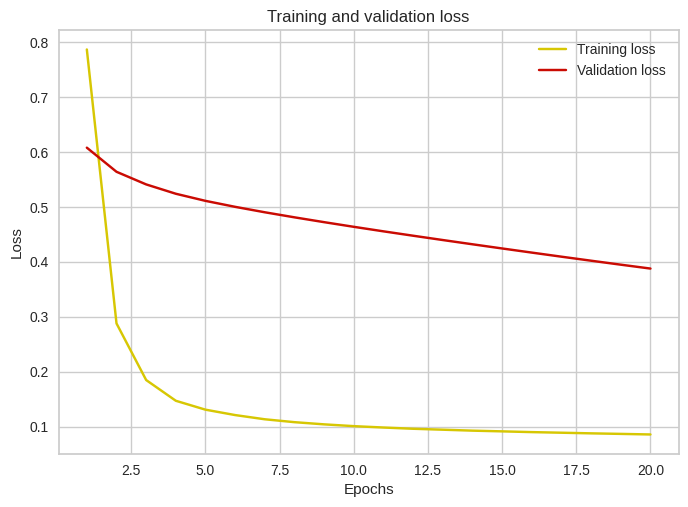

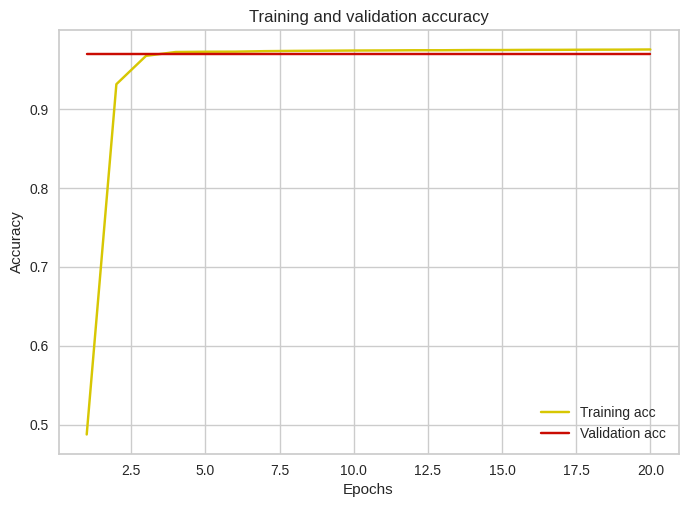

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#this cell was working but i upgrade the keras package and then it shows conflict between the old and updated libraries
#Load previously saved model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/brain_tumor_custom/model_25epochsregularized.hdf5', compile=False)

it was giving

In [ ]:

TESTimage_directory = '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor'
TESTmask_directory = '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Mask'

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/*.tif")
print(image_names)

['/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_DU_5849_19950405_25.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6668_20011025_16.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_11.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_13.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_DU_5849_19950405_21.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6669_20020102_15.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6669_20020102_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_17.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_14.tif',

In [ ]:

image_names.sort()
print(image_names)

['/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_11.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_13.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_14.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6667_20011105_17.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6668_20011025_16.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6669_20020102_10.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6669_20020102_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_CS_6669_20020102_15.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Tumor/TCGA_DU_5849_19950405_21.tif',

In [ ]:
images = [cv2.imread(img, 0) for img in image_names]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)
image_dataset

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [0],
         [0],
         ...,
         [1],
         [1],
         [0]],

        [[1],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [0],
         [0],
         ...,
         [1],


In [ ]:

mask_names = glob.glob("/content/drive/MyDrive/Aarchive_/brain_tumor_custom/test/test_Mask/*.tif")
mask_names.sort()
masks = [cv2.imread(mask, 0) for mask in mask_names]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)
mask_dataset

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
#IOU
y_pred=model.predict(image_dataset)
y_pred_thresholded = y_pred > 0.5

1/1 [==============================] - 36s 36s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.48473498


In [ ]:
# Define a function to calculate Dice coefficient
def calculate_dice(y_true, y_pred):
    numerator = 2 * np.logical_and(y_true, y_pred).sum()
    denominator = y_true.sum() + y_pred.sum()
    dice = numerator / denominator
    return dice

In [ ]:
ADC=calculate_dice(y_pred_thresholded, y_test)
ADC

0.139929261775347

(1, 256, 256, 1)
1/1 [==============================] - 0s 19ms/step
(256, 256)


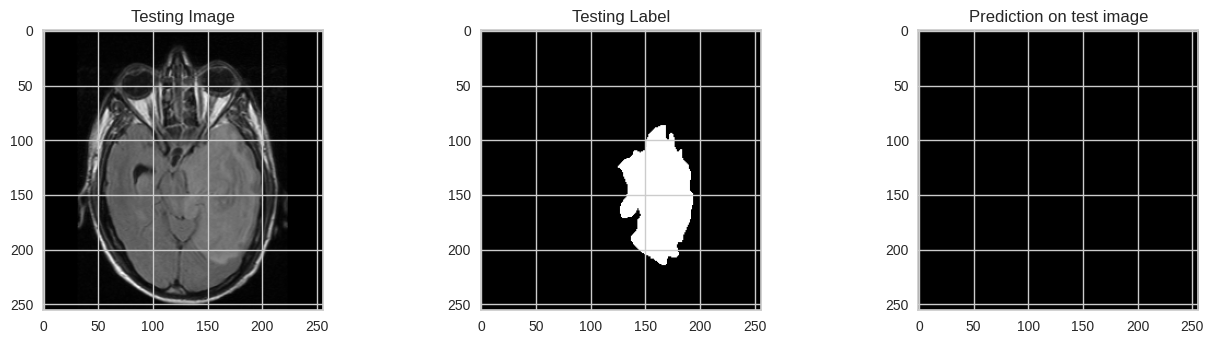

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0]).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

# **Conclusion of improvement1:**
 The high learning rate (0.1) caused rapid convergence, leading to instability and poor generalization. Training accuracy increased steadily, but validation accuracy remained stagnant. Adjustments in learning rate, regularization, or model architecture are needed for better generalization

# Improvement 2:Apply regularization and increase number of epochs and decresing learning rate of SGD

In [ ]:
image_directory = '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor'
mask_directory = '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Mask'

In [ ]:

SIZE = 256
num_images = 51

In [ ]:
image_names = glob.glob("/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/*.tif")
print(image_names)

['/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_5395_19981004_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_5396_20010302_14.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4944_20010208_8.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4944_20010208_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_5393_19990606_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_6188_20010812_15.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_6186_20000601_15.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_5397_20010315_10.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4944_20010208_9.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4944

In [ ]:
image_names.sort()
print(image_names)
images = [cv2.imread(img, 0) for img in image_names]
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)
image_dataset

['/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4941_19960909_11.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4941_19960909_14.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4943_20000902_13.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4943_20000902_14.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4943_20000902_17.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4943_20000902_18.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4943_20000902_19.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4943_20000902_20.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_4944_20010208_12.tif', '/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Tumor/TCGA_CS_49

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [2]],

        [[1],
         [1],
         [2],
         ...,
         [2],
         [1],
         [1]],

        [[2],
         [3],
         [2],
         ...,
         [1],
         [1],
         [2]],

        ...,

        [[2],
         [3],
         [2],
         ...,
         [7],
         [4],
         [1]],

        [[3],
         [3],
         [3],
         ...,
         [2],
         [3],
         [2]],

        [[2],
         [4],
         [3],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [1],
         [2],
         ...,
         [1],
         [1],
         [1]],

        [[2],
         [2],
         [3],
         ...,
         [2],
         [1],
         [1]],

        [[3],
         [2],
         [3],
         ...,
         [2],
         [1],
         [2]],

        ...,

        [[2],
         [2],
         [2],
         ...,
         [4],


In [ ]:
# for mask
mask_names = glob.glob("/content/drive/MyDrive/Aarchive_/brain_tumor_custom/train/train_Mask/*.tif")
mask_names.sort()
masks = [cv2.imread(mask, 0) for mask in mask_names]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)
mask_dataset

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))


Image data shape is:  (40, 256, 256, 1)
Mask data shape is:  (40, 256, 256, 1)
Max pixel value in image is:  233
Labels in the mask are :  [  0 255]


In [ ]:
#Normalize images
image_dataset = image_dataset /255.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
input_shape

(256, 256, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


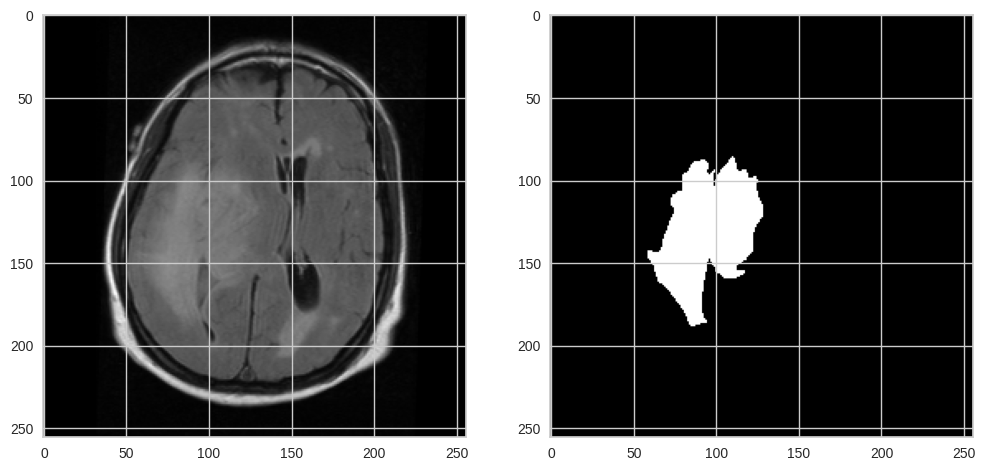

In [ ]:
#Sanity check, view few mages

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:

def conv_block(input, num_filters, dropout_prob=0.0):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    if dropout_prob > 0.0:
        x = Dropout(dropout_prob)(x)
    return x

# Encoder block: Conv block followed by maxpooling
def encoder_block(input, num_filters, dropout_prob=0.0):
    x = conv_block(input, num_filters, dropout_prob)
    p = MaxPool2D((2, 2))(x)
    return x, p

# Decoder block
# Skip features get input from encoder for concatenation
def decoder_block(input, skip_features, num_filters, dropout_prob=0.0):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters, dropout_prob)
    return x

# Build Unet using the blocks
def build_unet(input_shape, n_classes, dropout_prob=0.2):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64, dropout_prob)
    s2, p2 = encoder_block(p1, 128, dropout_prob)
    s3, p3 = encoder_block(p2, 256, dropout_prob)
    s4, p4 = encoder_block(p3, 512, dropout_prob)

    b1 = conv_block(p4, 1024, dropout_prob)  # Bridge

    d1 = decoder_block(b1, s4, 512, dropout_prob)
    d2 = decoder_block(d1, s3, 256, dropout_prob)
    d3 = decoder_block(d2, s2, 128, dropout_prob)
    d4 = decoder_block(d3, s1, 64, dropout_prob)

    if n_classes == 1:  # Binary
        activation = 'sigmoid'
    else:
        activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  # Change the activation based on n_classes
    model = Model(inputs, outputs, name="U-Net")
    return model


In [ ]:
from keras.optimizers import SGD

# Build the U-Net model
model = build_unet(input_shape, n_classes=1,dropout_prob=0.2)

# Compile the model with SGD optimizer
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 256, 256, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 64)   │              0 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ dropout[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128, 128, 128)  │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 128, 128, 128)  │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 128, 128, 128)  │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 128)  │              0 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ dropout_1[0][0]        │
│ (MaxPooling2D)       

 Total params: 31,054,145 (118.46 MB)

 Trainable params: 31,042,369 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 283s 148s/step - accuracy: 0.4493 - loss: 0.7601 - val_accuracy: 0.0066 - val_loss: 0.6940
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 310s 140s/step - accuracy: 0.4608 - loss: 0.7511 - val_accuracy: 0.0320 - val_loss: 0.6947
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 273s 150s/step - accuracy: 0.4726 - loss: 0.7429 - val_accuracy: 0.0946 - val_loss: 0.6953
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 316s 143s/step - accuracy: 0.4835 - loss: 0.7358 - val_accuracy: 0.1642 - val_loss: 0.6958
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 330s 155s/step - accuracy: 0.4978 - loss: 0.7281 - val_accuracy: 0.1901 - val_loss: 0.6962
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 259s 137s/step - accuracy: 0.5111 - loss: 0.7211 - val_accuracy: 0.1994 - val_loss: 0.6965
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 269s 147s/step - accuracy: 0.5222 - loss: 0.7147 - val_accuracy: 0.2708 - val_loss: 0.6968
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 321s 139s/step - accuracy: 0.5318 - loss: 0.7087 - val_accuracy: 0.3275 - v

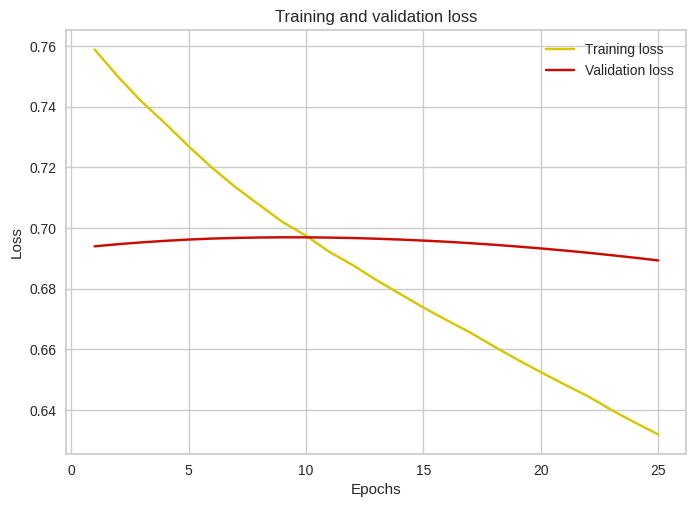

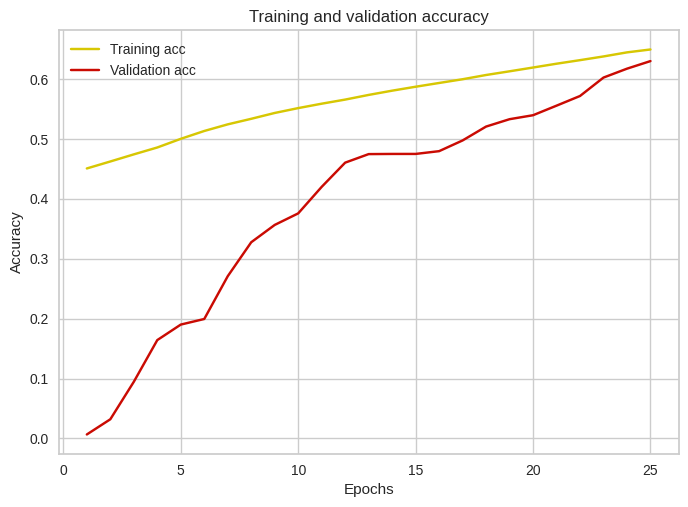

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Note:**
**runtime disconnected, and we could not save the model to evaluate on testing dataset. However this model after reqularization shows promising result**

# **Conclusion of Improvement2:**
After implementing a dropout of 20% in the decoder layers and adjusting the number of epochs while decreasing the learning rate of the stochastic gradient descent (SGD), noticeable improvements were observed in the model's learning from the training data. Both training and validation losses began to decrease, indicating better model performance. However,  the model would benefit from more data and additional epochs, as depicted in the plots. The accuracy for both training and validation data continued to increase still increase until the end , while the losses decreased. Due to limited computational resources and runtime constraints. Training a single experiment took approximately 5 hours, and the hardware was insufficient to handle the training load. Nevertheless, the experiments showed promising signs of progress, with the model moving in the right direction in terms of both training and validation sets. Additionally, it was noted that the dataset was relatively small and not fully representative, indicating the need for a larger and more diverse dataset to facilitate better learning.
with more number of epochs and larger dataset the model will get to the optimal situation.







